<a href="https://colab.research.google.com/github/AchiengMary/bin.classification_model/blob/main/update_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

with zipfile.ZipFile('demo_images.zip', 'r') as zip_ref:
    zip_ref.extractall('images')

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Define dataset path
dataset_path = "images/demo_images"

# Load images without validation split
datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    dataset_path, target_size=(128, 128), batch_size=4, class_mode='categorical')

# Check class names
print(train_data.class_indices)  # {'ai_generated': 0, 'edited': 1, 'real': 2, 'reused': 3}

Found 12 images belonging to 4 classes.
{'ai_generated': 0, 'edited': 1, 'real': 2, 'reused': 3}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.3646 - loss: 3.1488
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5729 - loss: 1.2062
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6562 - loss: 1.2935
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9583 - loss: 0.1257
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8646 - loss: 0.2111
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 1.0000 - loss: 0.0249
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 1.0000 - loss: 0.0023
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 1.0000 - loss: 0.0037
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 1.0000 - loss: 0.0022


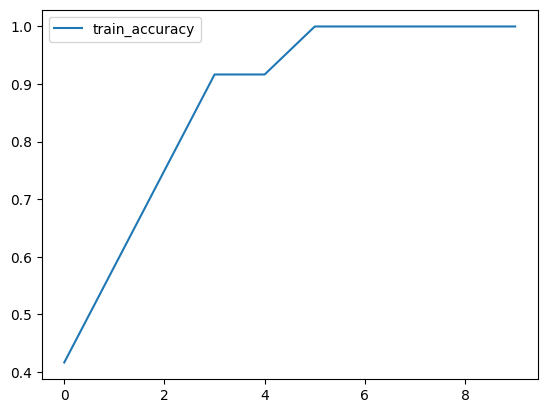

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define CNN model
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # 4 categories
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, epochs=10)

# Plot training results
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.legend()
plt.show()

In [4]:
model.save("demo_model.h5")

# Download the model in Google Colab
from google.colab import files
files.download("demo_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>